In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import xarray as xr

from salishsea_tools import viz_tools

%matplotlib inline

In [3]:
meshfile = '/Users/sallen/Documents/MEOPAR/grid/mesh_mask.nc'
bathyfile = '/Users/sallen/Documents/MEOPAR/grid/bathymetry_201702.nc'

In [4]:
mesh = xr.open_dataset(meshfile)

In [5]:
gdepw = mesh.gdepw_0.values
mbathy = mesh.mbathy.values
mbathy[0].shape

(898, 398)

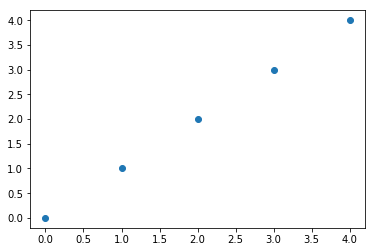

In [6]:
plt.plot(gdepw[0, :5, 50, 50], 'o')

In [7]:
depth = np.zeros_like(gdepw[0, 0])
print (depth.shape)

(898, 398)


In [8]:
for i in range(mbathy.shape[1]):
    for j in range(mbathy.shape[2]):
        depth[i, j] = gdepw[0, mbathy[0, i, j], i, j]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

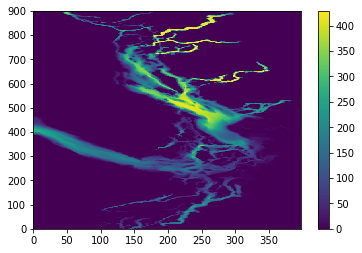

In [9]:
plt.pcolormesh(depth)
plt.colorbar()
depth

In [21]:
depth_data = xr.DataArray(depth, dims=['y', 'x'])
bathymetry = xr.Dataset({'bathymetry': depth_data})

In [24]:
mesh = mesh.merge(bathymetry)

In [25]:
mesh.to_netcdf('newmesh.nc')